In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv("hotel_bookings.csv")
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,no,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,no,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,no,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,no,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,no,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015
5,Resort Hotel,no,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015
6,Resort Hotel,no,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,7/3/2015
7,Resort Hotel,no,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,7/3/2015
8,Resort Hotel,yes,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,5/6/2015
9,Resort Hotel,yes,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,4/22/2015


In [15]:
df.shape

(119390, 32)

In [16]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  object 
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [18]:
 df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
 df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  object        
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [19]:
df.describe(include = 'object')

,hotel,is_canceled,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,no,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,75166,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [20]:
for col in df.describe(include = 'object').columns:
    print(col)
    print(df[col].unique())
    print("- "*50)

hotel
['Resort Hotel' 'City Hotel']
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
is_canceled
['no' 'yes']
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 

In [21]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [22]:
df.drop(['agent','company'],axis = 1,inplace = True)
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118898 non-null  object        
 1   is_canceled                     118898 non-null  object        
 2   lead_time                       118898 non-null  int64         
 3   arrival_date_year               118898 non-null  int64         
 4   arrival_date_month              118898 non-null  object        
 5   arrival_date_week_number        118898 non-null  int64         
 6   arrival_date_day_of_month       118898 non-null  int64         
 7   stays_in_weekend_nights         118898 non-null  int64         
 8   stays_in_week_nights            118898 non-null  int64         
 9   adults                          118898 non-null  int64         
 10  children                        118898 non-null  float64     

In [23]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [24]:
 df.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


<Axes: >

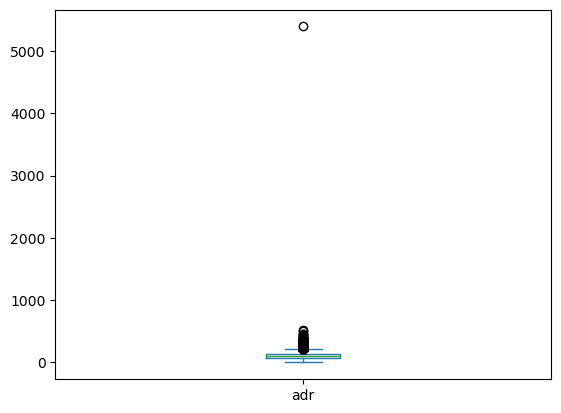

In [25]:
 df['adr'].plot(kind = 'box')

In [26]:
df = df[df['adr'] < 5000]
df.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897
mean,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688,2016-07-30 07:39:51.289939968
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000,2017-09-14 00:00:00
std,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680,NaN


# Data Analysis and Visualization¶

In [27]:
cancelled_percent = df['is_canceled'].value_counts(normalize = True)
print(cancelled_percent)

is_canceled
no     0.628653
yes    0.371347
Name: proportion, dtype: float64


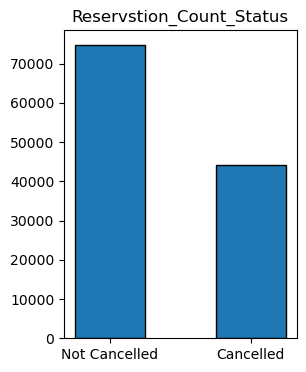

In [28]:
plt.figure(figsize = (3,4))
plt.title('Reservstion_Count_Status')
plt.bar(['Not Cancelled','Cancelled'],df['is_canceled'].value_counts(),edgecolor = 'k', width = 0.5)
plt.show()

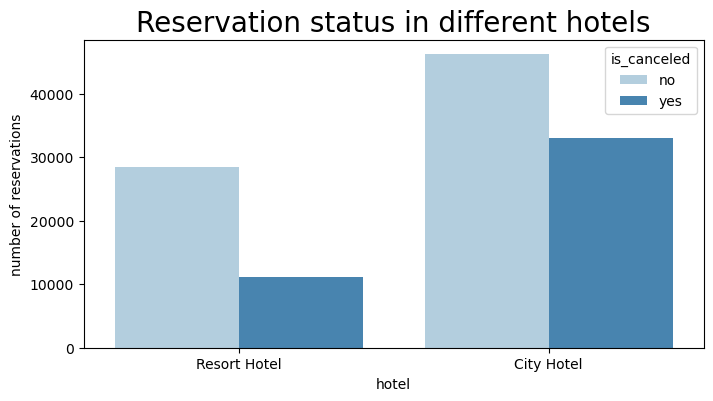

In [29]:
plt.figure(figsize = (8,4))

ax1= sns.countplot(x = 'hotel', hue = 'is_canceled', data= df, palette = 'Blues')

legend_labels=ax1.get_legend_handles_labels()

plt.title('Reservation status in different hotels', size = 20)
plt.xlabel('hotel')
plt.ylabel('number of reservations')
plt.show()

In [30]:
resort_hotels = df[df['hotel'] == 'Resort Hotel']
resort_hotels['is_canceled'].value_counts(normalize = True)

is_canceled
no     0.72025
yes    0.27975
Name: proportion, dtype: float64

In [32]:
city_hotels = df[df['hotel'] == 'City Hotel']
city_hotels['is_canceled'].value_counts(normalize = True)

is_canceled
no     0.582918
yes    0.417082
Name: proportion, dtype: float64

# plot visualizes and compares the average daily rates for city and resort hotels over time.

In [33]:
# Group by 'reservation_status_date' and calculate the mean 'adr' for each date

resort_hotels = resort_hotels.groupby('reservation_status_date')[['adr']].mean() 
city_hotels = city_hotels.groupby('reservation_status_date') [['adr']].mean()


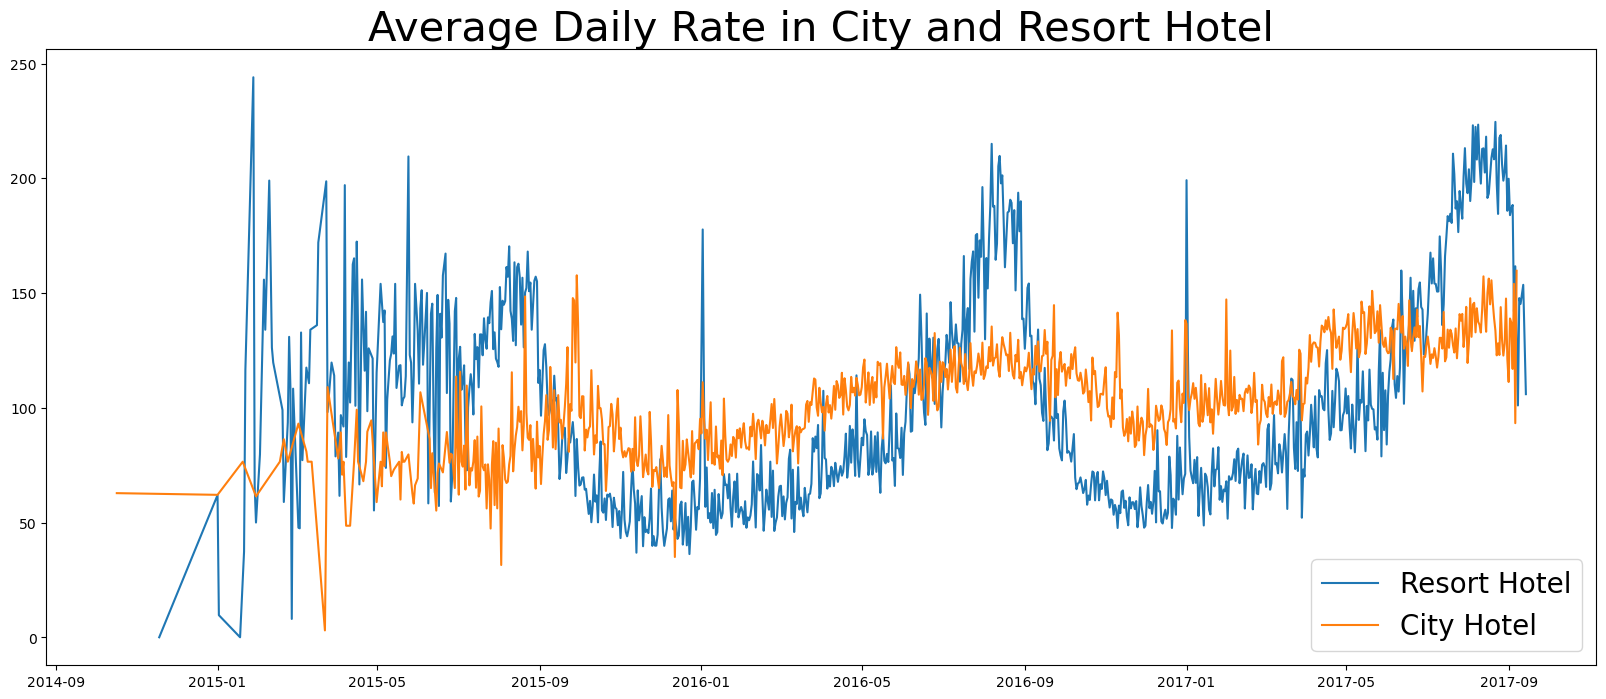

In [34]:
plt.figure(figsize=(20, 8))
plt.title('Average Daily Rate in City and Resort Hotel', fontsize=30)
plt.plot(resort_hotels.index, resort_hotels['adr'], label='Resort Hotel')
plt.plot(city_hotels.index, city_hotels['adr'], label='City Hotel')
plt.legend(fontsize=20)
plt.show()

 # visualizes the number of reservations per month(canceled and non-canceled)

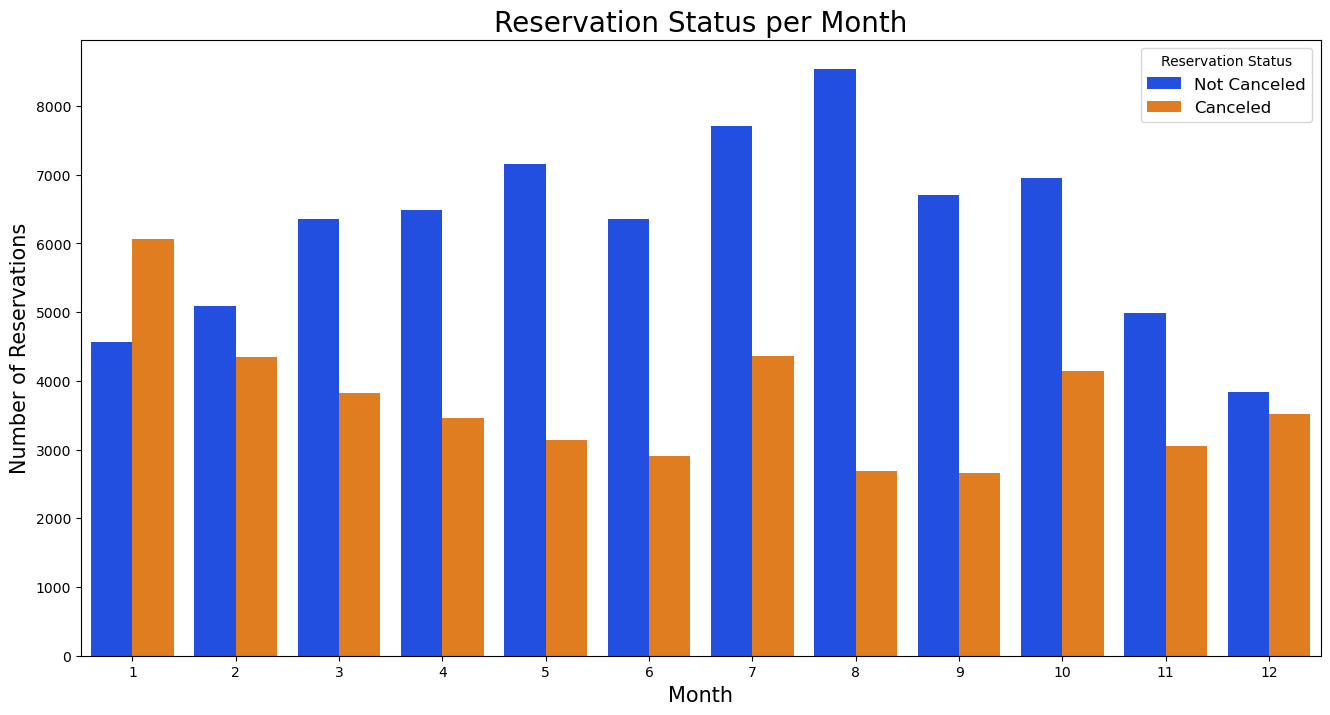

In [36]:
# Extract month from the reservation_status_date
df['month'] = df['reservation_status_date'].dt.month

# Set the figure size
plt.figure(figsize=(16, 8))

# Create a count plot for reservations by month, with hues for cancellation status
ax1 = sns.countplot(x='month', hue='is_canceled', data=df, palette='bright')

# Set title and axis labels
plt.title('Reservation Status per Month', size=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Number of Reservations', fontsize=15)

# Set legend labels manually
plt.legend(title='Reservation Status', labels=['Not Canceled', 'Canceled'], fontsize=12)

# Show the plot
plt.show()


           hotel is_canceled  lead_time  arrival_date_year arrival_date_month  \
8   Resort Hotel         yes         85               2015               July   
9   Resort Hotel         yes         75               2015               July   
10  Resort Hotel         yes         23               2015               July   
27  Resort Hotel         yes         60               2015               July   
32  Resort Hotel         yes         96               2015               July   

    arrival_date_week_number  arrival_date_day_of_month  \
8                         27                          1   
9                         27                          1   
10                        27                          1   
27                        27                          1   
32                        27                          1   

    stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
8                         0                     3       2  ...   
9                         

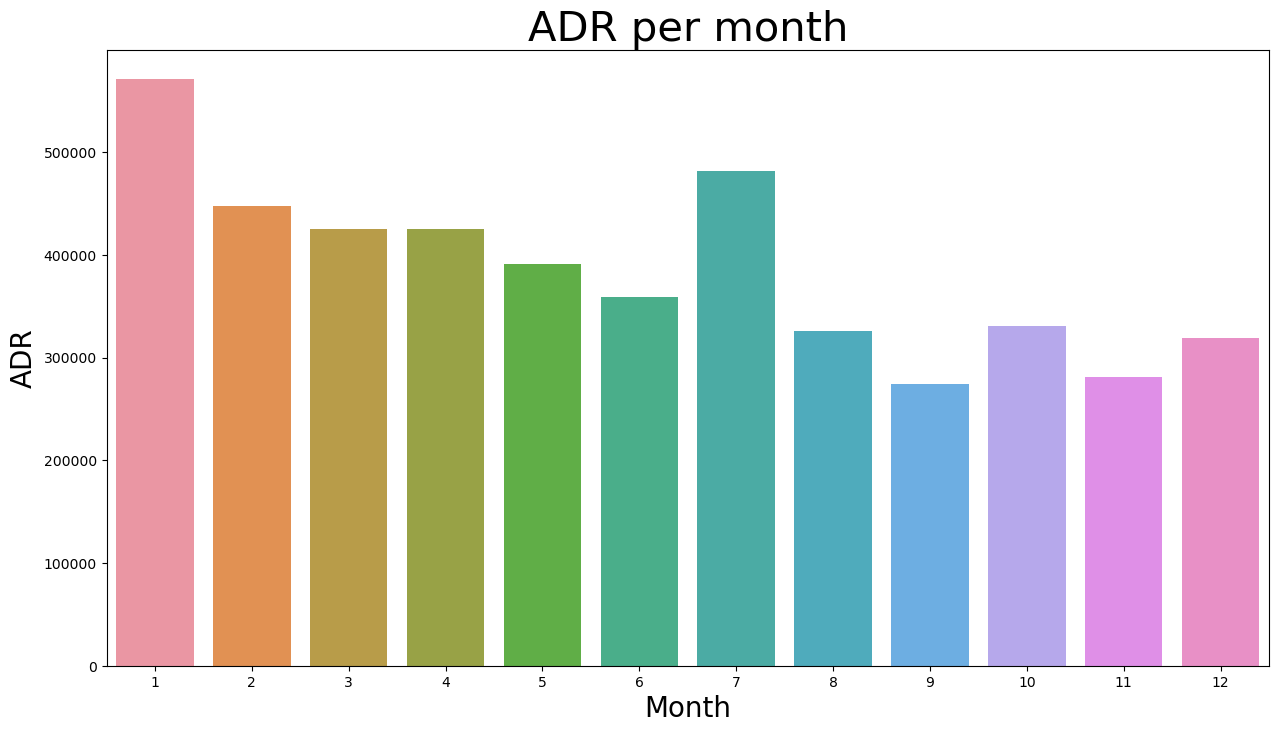

In [49]:
# Filter for canceled reservations
df_canceled = df[df['is_canceled'] == 'yes']

# Check the filtered data
print(df_canceled.head())  # Debugging line

# Calculate monthly ADR sums for canceled reservations
monthly_adr_sum = df_canceled.groupby('month')['adr'].sum().reset_index()
print(monthly_adr_sum)  # Debugging line

# Plot the monthly ADR sums
plt.figure(figsize=(15, 8))
plt.title('ADR per month', fontsize=30)
sns.barplot(x='month', y='adr', data=monthly_adr_sum)
plt.xlabel('Month', fontsize=20)
plt.ylabel('ADR', fontsize=20)
plt.show()


# Canceled reservations among the top 10 countries.

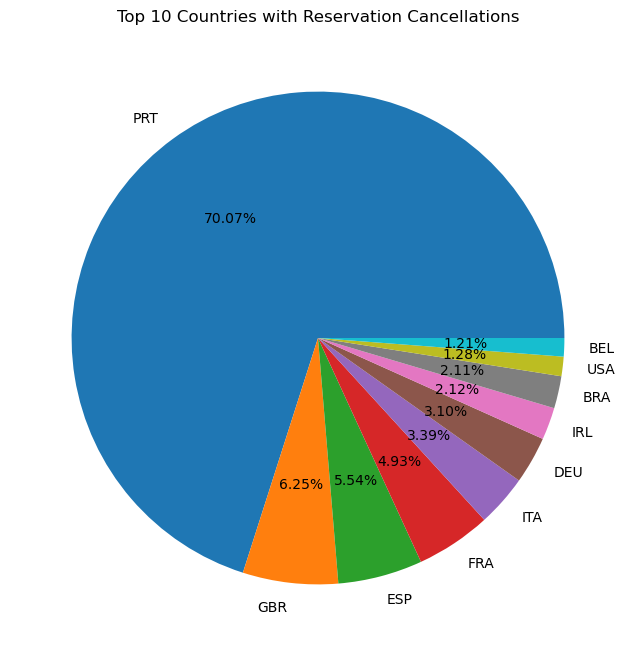

In [50]:
# Filter canceled reservations
cancelled_data = df[df['is_canceled'] == 'yes']  # Corrected filter condition

# Get the top 10 countries with the most canceled reservations
top_10_country = cancelled_data['country'].value_counts()[:10]

# Plot the data
plt.figure(figsize=(8, 8))
plt.title('Top 10 Countries with Reservation Cancellations')
plt.pie(top_10_country, autopct='%.2f%%', labels=top_10_country.index)
plt.show()

# Percentage of Bookings and Cancellation made thorugh different market segments.

In [51]:
df['market_segment'].value_counts()

market_segment
Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

In [56]:
(df['market_segment'].value_counts(normalize = True)*100).round(2)

market_segment
Online TA        47.44
Offline TA/TO    20.32
Groups           16.66
Direct           10.47
Corporate         4.30
Complementary     0.62
Aviation          0.20
Name: proportion, dtype: float64

In [57]:
(cancelled_data['market_segment'].value_counts(normalize=True) * 100).round(2)


market_segment
Online TA        46.97
Groups           27.40
Offline TA/TO    18.75
Direct            4.35
Corporate         2.22
Complementary     0.20
Aviation          0.12
Name: proportion, dtype: float64

# Shows the trend in Average Daily Rate (ADR) over time for both canceled and non-canceled reservations

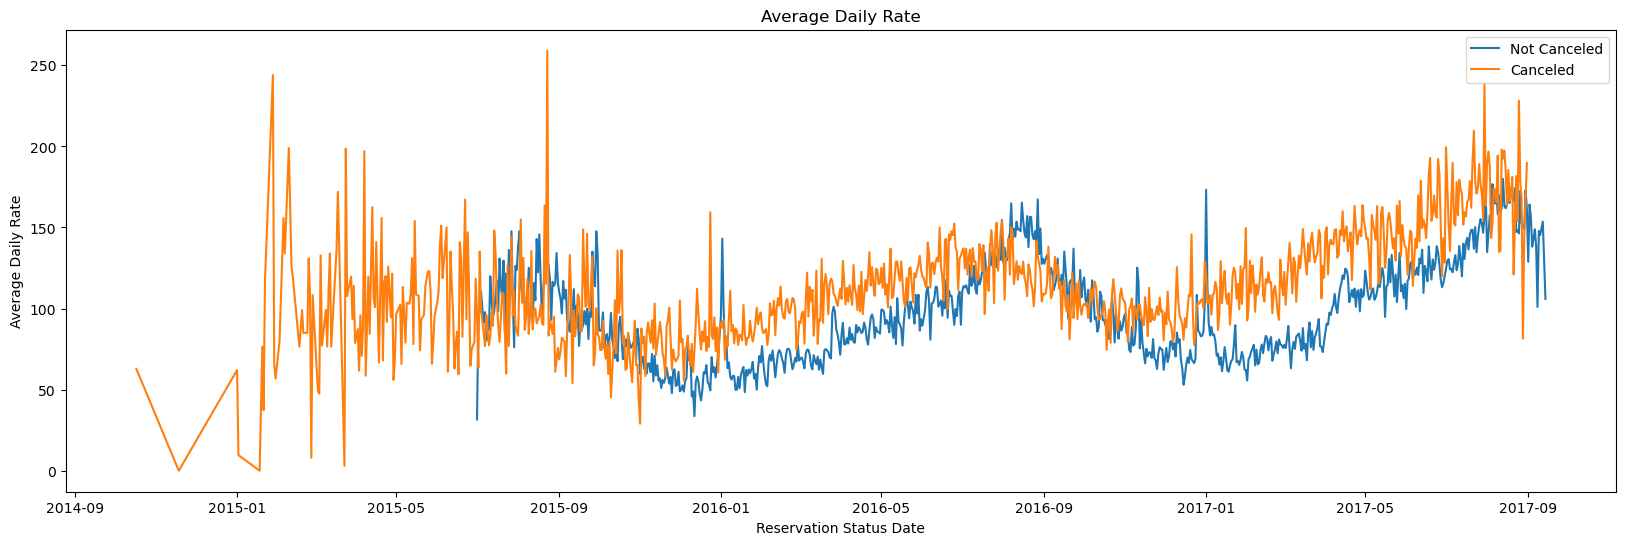

In [58]:
# Filter and group data
cancelled_data = df[df['is_canceled'] == 'yes']
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace=True)
cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

not_cancelled_data = df[df['is_canceled'] == 'no']
not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace=True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

# Plot
plt.figure(figsize=(20,6))
plt.title('Average Daily Rate')
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label='Not Canceled')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label='Canceled')
plt.legend()
plt.xlabel('Reservation Status Date')
plt.ylabel('Average Daily Rate')
plt.show()

# ADR data for canceled and not canceled reservations within the specified date range(January 2017 to September 2017)

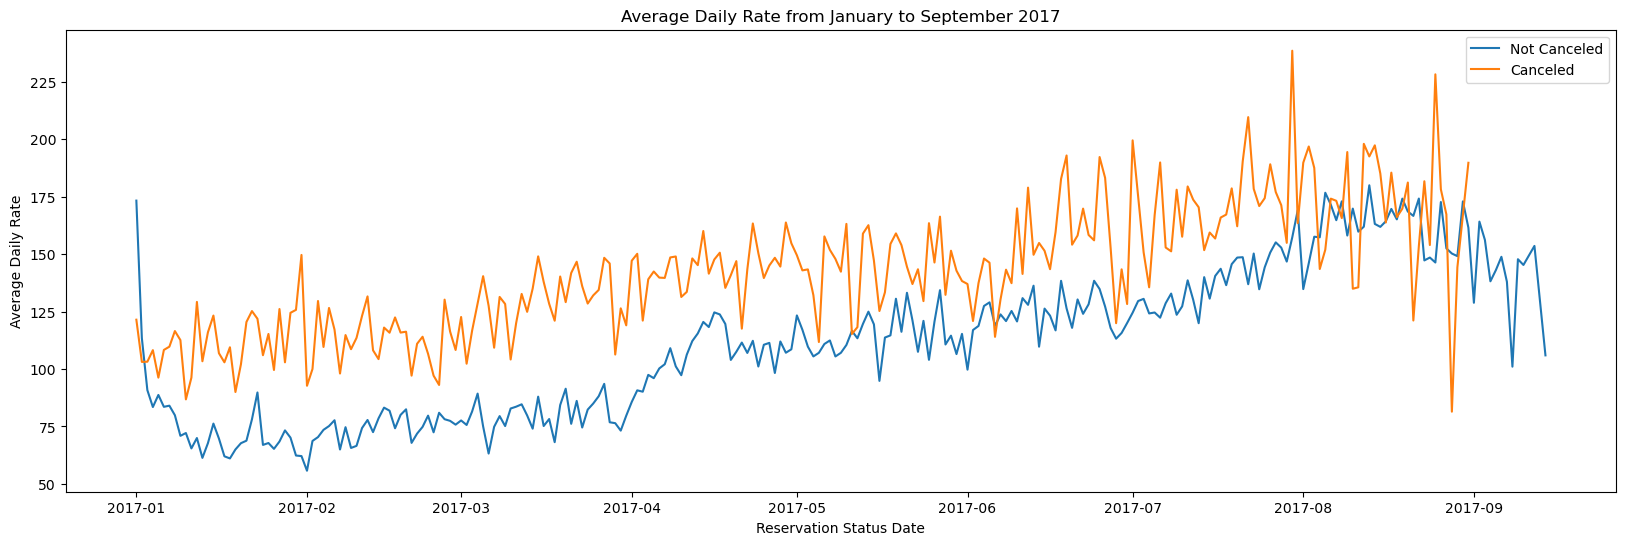

In [59]:
# Ensure 'reservation_status_date' is in datetime format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Filter the cancelled data
cancelled_data = df[df['is_canceled'] == 'yes']
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace=True)

# Filter the not canceled data
not_cancelled_data = df[df['is_canceled'] == 'no']
not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace=True)

# Filter data within the specified date range
start_date = '2017-01-01'
end_date = '2017-09-30'
cancelled_df_adr = cancelled_df_adr[(cancelled_df_adr['reservation_status_date'] >= start_date) & (cancelled_df_adr['reservation_status_date'] <= end_date)]
not_cancelled_df_adr = not_cancelled_df_adr[(not_cancelled_df_adr['reservation_status_date'] >= start_date) & (not_cancelled_df_adr['reservation_status_date'] <= end_date)]

# Plot the data
plt.figure(figsize=(20,6))
plt.title('Average Daily Rate from January to September 2017')
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label='Not Canceled')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label='Canceled')
plt.legend()
plt.xlabel('Reservation Status Date')
plt.ylabel('Average Daily Rate')
plt.show()
